In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.dates as mdates

In [163]:

# Define MAPE function
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Load the data
daily_stat = pd.read_csv('daily_stat.csv').dropna()

# Parse the date column to datetime format
daily_stat['date'] = pd.to_datetime(daily_stat['date'])

# Define the function to classify periods
def classify_heating_period(row):
    if row['ext_temp_mean'] < 15:
        return 'SH+DWH'
    else:
        return 'DWH'

In [164]:

# Apply the function to create a new column
daily_stat['Heating_Period'] = daily_stat.apply(classify_heating_period, axis=1)

# Round all float columns to 4 decimal places
#columns_to_round = daily_stat.columns.drop('date')
#daily_stat[columns_to_round] = daily_stat[columns_to_round].round(4)


In [165]:

# Set the date column as the index
#daily_stat.set_index('date', inplace=True)

# Resample the data to a 4-hour frequency and aggregate by mean
#resampled_stat = daily_stat#.resample('4H').mean().dropna()

# Reset index to have the date as a column again
#resampled_stat.reset_index(inplace=True)

# Extract features and target
features = daily_stat[['SH_temp_mean', 'SH_hum_mean', 'DWH_temp_mean', 'DWH_hum_mean', 'ext_temp_mean','ext_hum_mean']]
target = daily_stat['Gas_mean']


In [166]:
daily_stat.dtypes

date              datetime64[ns]
Gas_sum                  float64
Gas_max                  float64
Gas_min                  float64
Gas_mean                 float64
ext_temp_max             float64
ext_temp_min             float64
ext_temp_mean            float64
ext_hum_max              float64
ext_hum_min              float64
ext_hum_mean             float64
SH_temp_max              float64
SH_temp_min              float64
SH_temp_mean             float64
SH_hum_max               float64
SH_hum_min               float64
SH_hum_mean              float64
DWH_temp_max             float64
DWH_temp_min             float64
DWH_temp_mean            float64
DWH_hum_max              float64
DWH_hum_min              float64
DWH_hum_mean             float64
Heating_Period            object
dtype: object

In [167]:

# Normalize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Split data while keeping the date for plotting
X_train, X_test, y_train, y_test, date_train, date_test = train_test_split(features_scaled, target, daily_stat['date'], test_size=0.2, random_state=42)


In [168]:

# Build ANN model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Predict gas consumption on the test set
predictions = model.predict(X_test).flatten()

Epoch 1/100
7/7 [==============================] - 1s 18ms/step - loss: 0.0217 - val_loss: 0.0064
Epoch 2/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0123 - val_loss: 0.0036
Epoch 3/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0129 - val_loss: 0.0021
Epoch 4/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0084 - val_loss: 0.0017
Epoch 5/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0070 - val_loss: 0.0017
Epoch 6/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0067 - val_loss: 0.0015
Epoch 7/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0059 - val_loss: 0.0011
Epoch 8/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0045 - val_loss: 9.1227e-04
Epoch 9/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0063 - val_loss: 9.5890e-04
Epoch 10/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0049 - val_loss: 9.9245e-04
Epoch 11/100
7/7

7/7 [==============================] - 0s 5ms/step - loss: 4.1504e-04 - val_loss: 2.0143e-04
Epoch 81/100
7/7 [==============================] - 0s 5ms/step - loss: 5.1706e-04 - val_loss: 1.9545e-04
Epoch 82/100
7/7 [==============================] - 0s 5ms/step - loss: 3.7396e-04 - val_loss: 1.7326e-04
Epoch 83/100
7/7 [==============================] - 0s 5ms/step - loss: 3.6464e-04 - val_loss: 1.6317e-04
Epoch 84/100
7/7 [==============================] - 0s 5ms/step - loss: 3.7371e-04 - val_loss: 2.2916e-04
Epoch 85/100
7/7 [==============================] - 0s 5ms/step - loss: 4.1592e-04 - val_loss: 2.2329e-04
Epoch 86/100
7/7 [==============================] - 0s 5ms/step - loss: 4.2423e-04 - val_loss: 2.2241e-04
Epoch 87/100
7/7 [==============================] - 0s 5ms/step - loss: 3.9147e-04 - val_loss: 1.7501e-04
Epoch 88/100
7/7 [==============================] - 0s 5ms/step - loss: 2.6697e-04 - val_loss: 1.9056e-04
Epoch 89/100
7/7 [==============================] - 0s 5ms/

In [169]:

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
mape = mean_absolute_percentage_error(y_test, predictions)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')


Mean Absolute Error (MAE): 0.01277262222707301
Mean Squared Error (MSE): 0.00026839746922110454
R-squared (R²): 0.7822474591749122
Mean Absolute Percentage Error (MAPE): 58.335801172650235%


In [170]:

# Assuming SH periods are marked in your dataset, create boolean masks for SH and DWH periods
external_temp_test = X_test[:, 4] * scaler.scale_[4] + scaler.mean_[4]  # Reverse normalization for external temp
sh_dwh_periods = external_temp_test < 15
dwh_periods = external_temp_test >= 15

# For simplicity, assume gas consumption for SH and DWH can be linearly decomposed
sh_dwh_contributions = predictions * sh_dwh_periods
dwh_contributions = predictions * dwh_periods


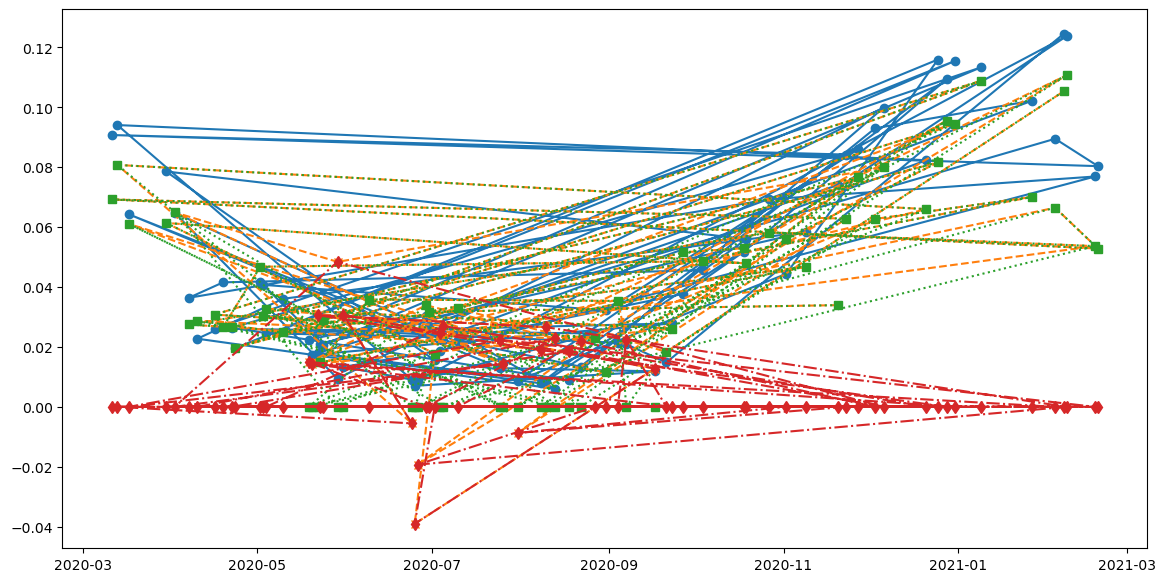

In [171]:

# Plot actual vs predicted gas consumption over time
plt.figure(figsize=(14, 7))
plt.plot(date_test, y_test, label='Actual Gas Consumption', marker='o')
plt.plot(date_test, predictions, label='Predicted Total Gas Consumption', marker='x', linestyle='--')
plt.plot(date_test, sh_dwh_contributions, label='Predicted SH+DWH Gas Consumption', marker='s', linestyle=':')
plt.plot(date_test, dwh_contributions, label='Predicted DWH Gas Consumption', marker='d', linestyle='-.')


Epoch 1/100
167/167 [==============================] - 1s 2ms/step - loss: 0.0225 - val_loss: 0.0021
Epoch 2/100
167/167 [==============================] - 0s 1ms/step - loss: 0.0047 - val_loss: 0.0015
Epoch 3/100
167/167 [==============================] - 0s 1ms/step - loss: 0.0032 - val_loss: 0.0017
Epoch 4/100
167/167 [==============================] - 0s 1ms/step - loss: 0.0024 - val_loss: 0.0014
Epoch 5/100
167/167 [==============================] - 0s 1ms/step - loss: 0.0020 - val_loss: 0.0012
Epoch 6/100
167/167 [==============================] - 0s 1ms/step - loss: 0.0018 - val_loss: 0.0013
Epoch 7/100
167/167 [==============================] - 0s 1ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 8/100
167/167 [==============================] - 0s 1ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 9/100
167/167 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 10/100
167/167 [==============================] - 0s 1ms/step - loss: 0.0013 - val_lo

167/167 [==============================] - 0s 1ms/step - loss: 8.0927e-04 - val_loss: 9.0180e-04
Epoch 78/100
167/167 [==============================] - 0s 1ms/step - loss: 7.9698e-04 - val_loss: 8.9192e-04
Epoch 79/100
167/167 [==============================] - 0s 1ms/step - loss: 7.8475e-04 - val_loss: 9.6372e-04
Epoch 80/100
167/167 [==============================] - 0s 1ms/step - loss: 8.0519e-04 - val_loss: 9.0249e-04
Epoch 81/100
167/167 [==============================] - 0s 1ms/step - loss: 7.9144e-04 - val_loss: 8.8995e-04
Epoch 82/100
167/167 [==============================] - 0s 1ms/step - loss: 8.0569e-04 - val_loss: 9.0597e-04
Epoch 83/100
167/167 [==============================] - 0s 1ms/step - loss: 7.9804e-04 - val_loss: 9.0099e-04
Epoch 84/100
167/167 [==============================] - 0s 1ms/step - loss: 7.8477e-04 - val_loss: 9.0457e-04
Epoch 85/100
167/167 [==============================] - 0s 1ms/step - loss: 7.9046e-04 - val_loss: 8.9399e-04
Epoch 86/100
167/167 [=

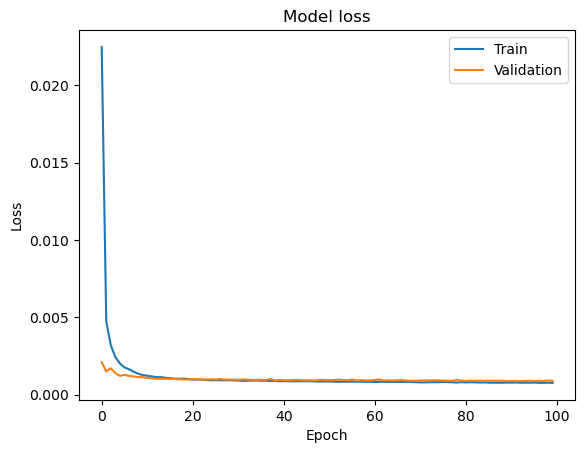

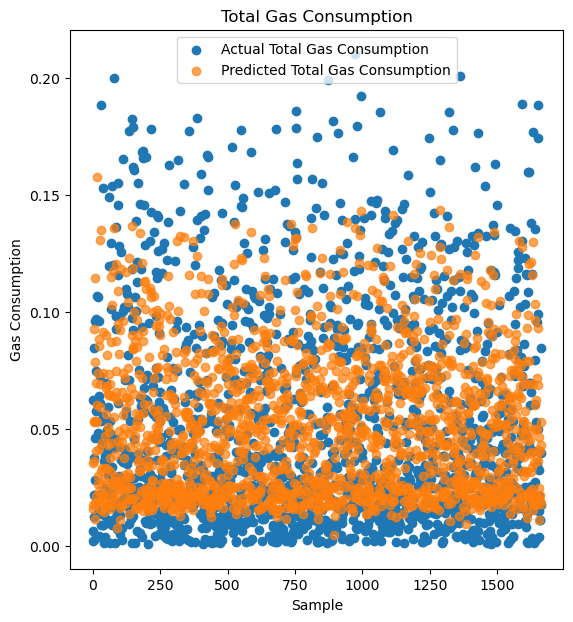

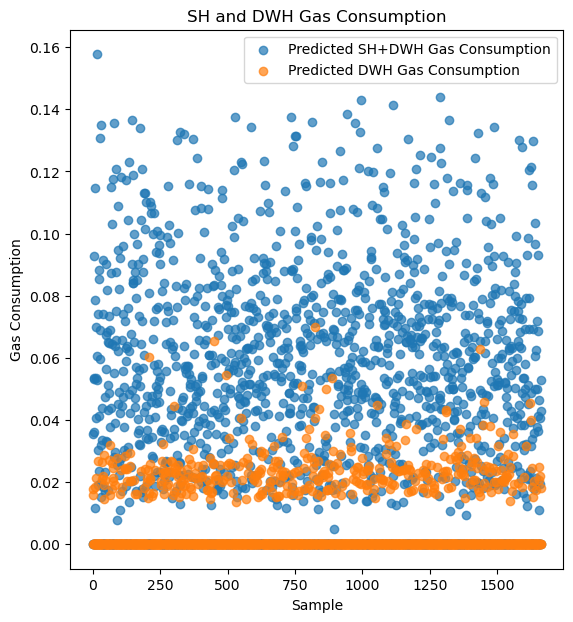

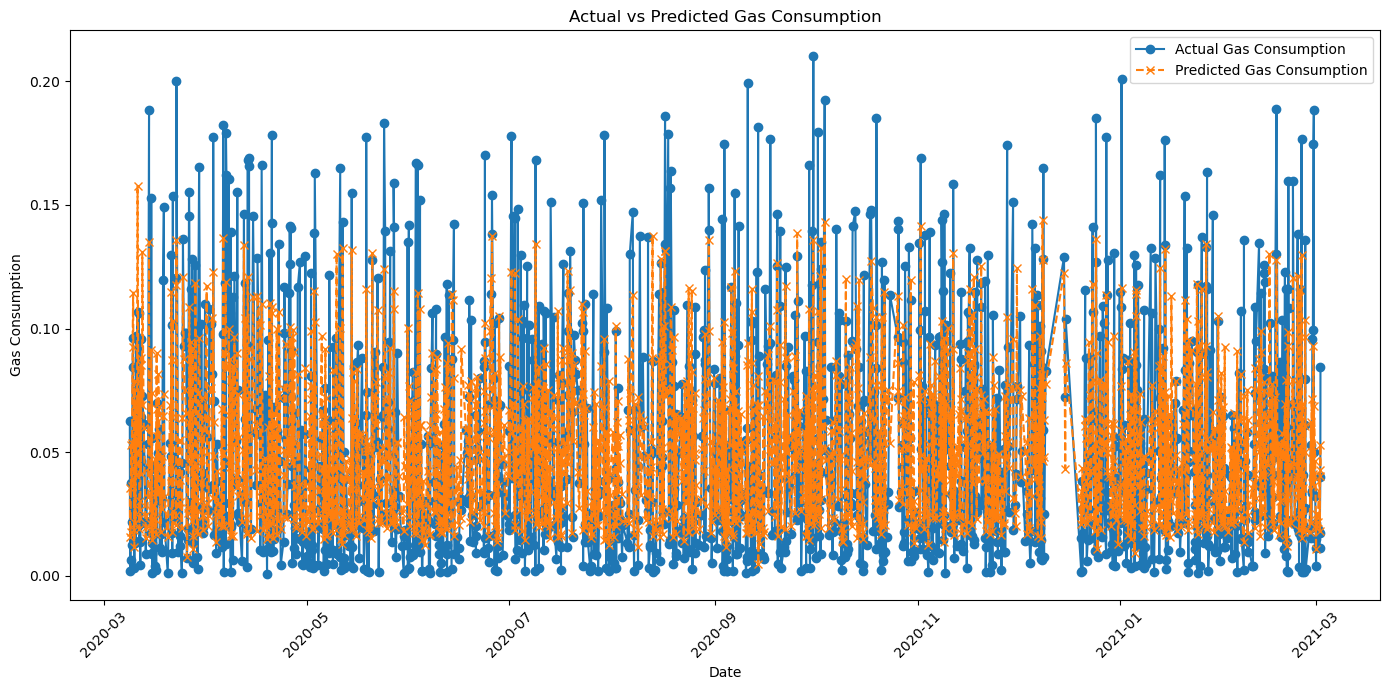

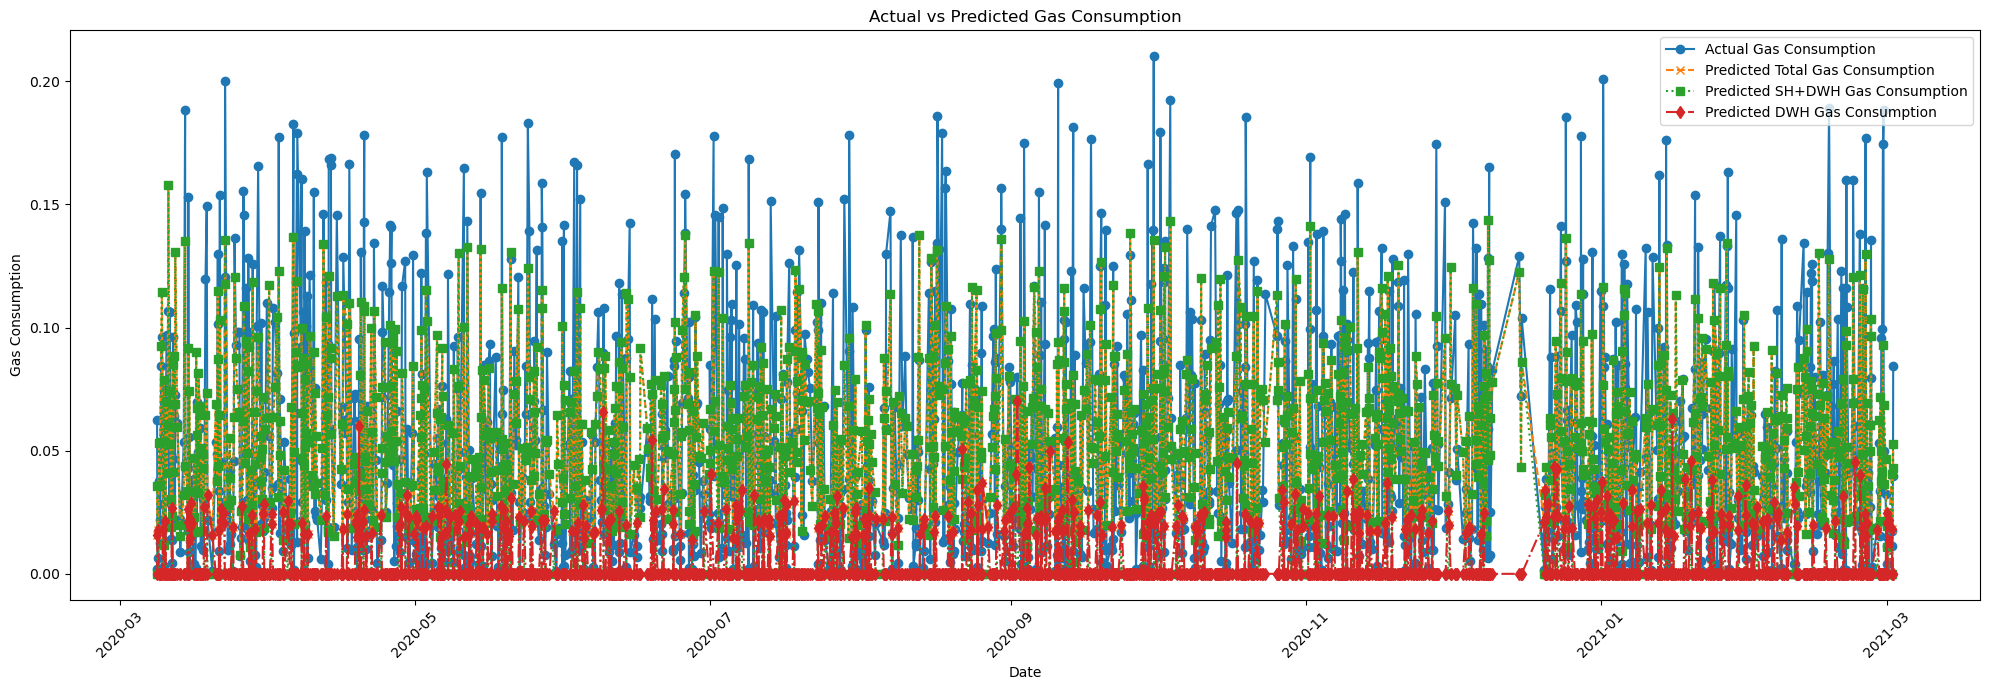

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load the data
daily_stat = pd.read_csv('hourly_stat.csv').dropna()

# Ensure the date column is parsed as datetime
daily_stat['date'] = pd.to_datetime(daily_stat['date'])

# Extract features and target
features = daily_stat[['SH_temp_mean', 'SH_hum_mean', 'DWH_temp_mean', 'DWH_hum_mean', 'ext_temp_mean', 'ext_hum_mean']]
target = daily_stat['Gas_mean']

# Normalize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Split data while keeping the date for plotting
X_train, X_test, y_train, y_test, date_train, date_test = train_test_split(features_scaled, target, daily_stat['date'], test_size=0.2, random_state=42)

# Ensure dates are sorted
date_test = pd.Series(date_test).sort_values().reset_index(drop=True)
date_train = pd.Series(date_train).sort_values().reset_index(drop=True)


# Build ANN model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Predict gas consumption on the test set
predictions = model.predict(X_test).flatten()

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
mape = mean_absolute_percentage_error(y_test, predictions)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')

# Assuming SH periods are marked in your dataset, create boolean masks for SH and DWH periods
external_temp_test = X_test[:, 4] * scaler.scale_[4] + scaler.mean_[4]  # Reverse normalization for external temp
sh_dwh_periods = external_temp_test < 15
dwh_periods = external_temp_test >= 15

# For simplicity, assume gas consumption for SH and DWH can be linearly decomposed
sh_dwh_contributions = predictions * sh_dwh_periods
dwh_contributions = predictions * dwh_periods

# Plot training loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Compare actual vs predicted SH and DWH gas consumption
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.scatter(range(len(y_test)), y_test, label='Actual Total Gas Consumption')
plt.scatter(range(len(y_test)), predictions, label='Predicted Total Gas Consumption', alpha=0.7)
plt.title('Total Gas Consumption')
plt.xlabel('Sample')
plt.ylabel('Gas Consumption')
plt.legend()

plt.show()

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 2)
plt.scatter(range(len(y_test)), sh_dwh_contributions, label='Predicted SH+DWH Gas Consumption', alpha=0.7)
plt.scatter(range(len(y_test)), dwh_contributions, label='Predicted DWH Gas Consumption', alpha=0.7)
plt.title('SH and DWH Gas Consumption')
plt.xlabel('Sample')
plt.ylabel('Gas Consumption')
plt.legend()

plt.show()

# Plot actual vs predicted gas consumption over time
plt.figure(figsize=(14, 7))
plt.plot(date_test, y_test, label='Actual Gas Consumption', marker='o')
plt.plot(date_test, predictions, label='Predicted Gas Consumption', marker='x', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Gas Consumption')
plt.title('Actual vs Predicted Gas Consumption')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot actual vs predicted gas consumption over time with SH and DWH contributions
plt.figure(figsize=(20, 7))
plt.plot(date_test, y_test, label='Actual Gas Consumption', marker='o')
plt.plot(date_test, predictions, label='Predicted Total Gas Consumption', marker='x', linestyle='--')
plt.plot(date_test, sh_dwh_contributions, label='Predicted SH+DWH Gas Consumption', marker='s', linestyle=':')
plt.plot(date_test, dwh_contributions, label='Predicted DWH Gas Consumption', marker='d', linestyle='-.')

plt.xlabel('Date')
plt.ylabel('Gas Consumption')
plt.title('Actual vs Predicted Gas Consumption')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




Epoch 1/20
167/167 [==============================] - 0s 1ms/step - loss: 7.6193e-04 - val_loss: 8.6633e-04
Epoch 2/20
167/167 [==============================] - 0s 1ms/step - loss: 7.6808e-04 - val_loss: 8.7851e-04
Epoch 3/20
167/167 [==============================] - 0s 1ms/step - loss: 7.5166e-04 - val_loss: 8.6937e-04
Epoch 4/20
167/167 [==============================] - 0s 1ms/step - loss: 7.6570e-04 - val_loss: 8.6406e-04
Epoch 5/20
167/167 [==============================] - 0s 1ms/step - loss: 7.7216e-04 - val_loss: 8.7936e-04
Epoch 6/20
167/167 [==============================] - 0s 1ms/step - loss: 7.5619e-04 - val_loss: 8.5619e-04
Epoch 7/20
167/167 [==============================] - 0s 1ms/step - loss: 7.4672e-04 - val_loss: 8.7682e-04
Epoch 8/20
167/167 [==============================] - 0s 1ms/step - loss: 7.4930e-04 - val_loss: 8.9658e-04
Epoch 9/20
167/167 [==============================] - 0s 1ms/step - loss: 7.6551e-04 - val_loss: 8.8040e-04
Epoch 10/20
167/167 [=======

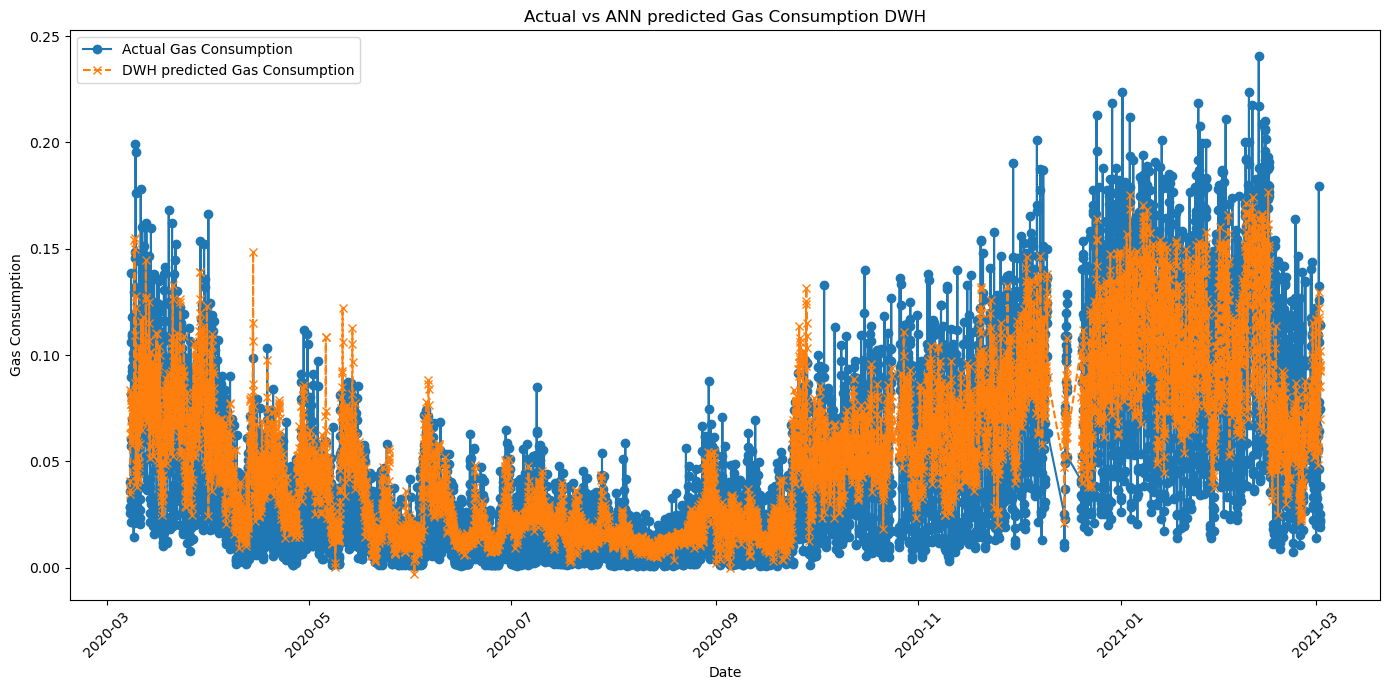

In [173]:
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)
predictions = model.predict(features_scaled).flatten()

# Plot actual vs DWH predicted gas consumption over time
plt.figure(figsize=(14, 7))
plt.plot(daily_stat['date'], daily_stat['Gas_mean'], label='Actual Gas Consumption', marker='o')
plt.plot(daily_stat['date'], predictions, label='DWH predicted Gas Consumption', marker='x', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Gas Consumption')
plt.title('Actual vs ANN predicted Gas Consumption DWH')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ANN TOTAL

Epoch 1/20
7/7 [==============================] - 1s 18ms/step - loss: 0.0924 - val_loss: 0.0262
Epoch 2/20
7/7 [==============================] - 0s 5ms/step - loss: 0.0323 - val_loss: 0.0107
Epoch 3/20
7/7 [==============================] - 0s 5ms/step - loss: 0.0212 - val_loss: 0.0076
Epoch 4/20
7/7 [==============================] - 0s 5ms/step - loss: 0.0148 - val_loss: 0.0060
Epoch 5/20
7/7 [==============================] - 0s 5ms/step - loss: 0.0149 - val_loss: 0.0060
Epoch 6/20
7/7 [==============================] - 0s 5ms/step - loss: 0.0157 - val_loss: 0.0034
Epoch 7/20
7/7 [==============================] - 0s 5ms/step - loss: 0.0109 - val_loss: 0.0027
Epoch 8/20
7/7 [==============================] - 0s 5ms/step - loss: 0.0132 - val_loss: 0.0038
Epoch 9/20
7/7 [==============================] - 0s 5ms/step - loss: 0.0102 - val_loss: 0.0042
Epoch 10/20
7/7 [==============================] - 0s 5ms/step - loss: 0.0102 - val_loss: 0.0029
Epoch 11/20
7/7 [=====================

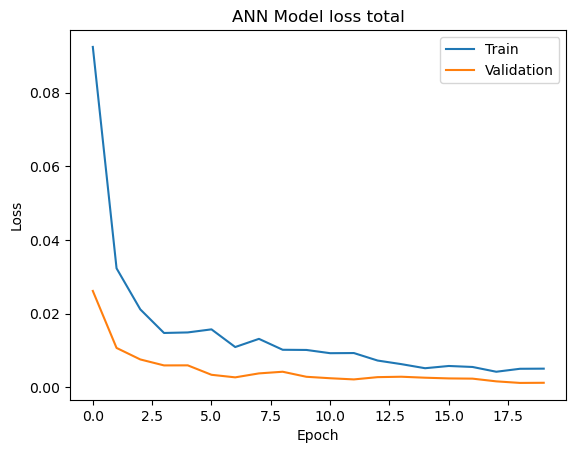

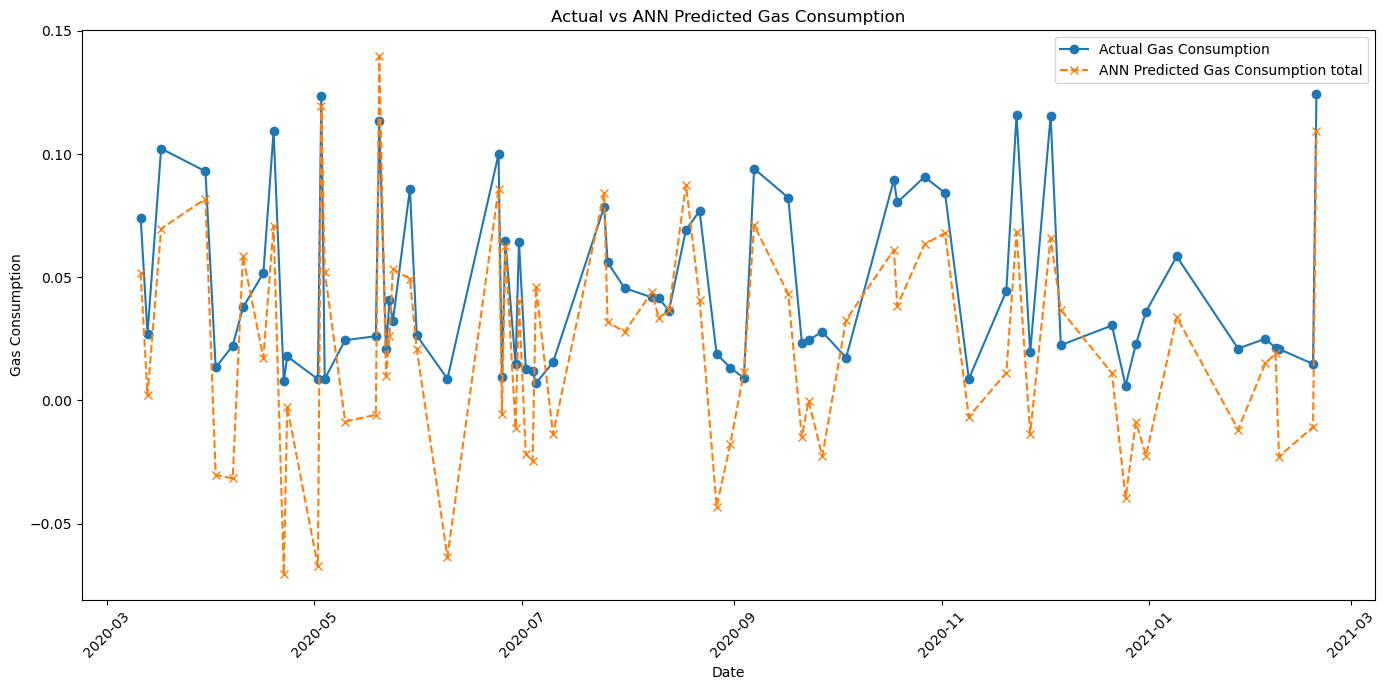

In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load the data
daily_stat = pd.read_csv('daily_stat.csv').dropna()

# Ensure the date column is parsed as datetime
daily_stat['date'] = pd.to_datetime(daily_stat['date'])

# Extract features and target
features = daily_stat[['SH_temp_mean', 'SH_hum_mean', 'DWH_temp_mean', 'DWH_hum_mean']]
target = daily_stat['Gas_mean']

# Normalize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Split data while keeping the date for plotting
X_train, X_test, y_train, y_test, date_train, date_test = train_test_split(features_scaled, target, daily_stat['date'], test_size=0.2, random_state=42)

# Ensure dates are sorted
date_test = pd.Series(date_test).sort_values().reset_index(drop=True)
date_train = pd.Series(date_train).sort_values().reset_index(drop=True)


# Build ANN model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Predict gas consumption on the test set
predictions = model.predict(X_test).flatten()

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
mape = mean_absolute_percentage_error(y_test, predictions)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')

# Assuming SH periods are marked in your dataset, create boolean masks for SH and DWH periods
#external_temp_test = X_test[:, 4] * scaler.scale_[4] + scaler.mean_[4]  # Reverse normalization for external temp
#sh_dwh_periods = external_temp_test < 15
#dwh_periods = external_temp_test >= 15

# For simplicity, assume gas consumption for SH and DWH can be linearly decomposed
#sh_dwh_contributions = predictions * sh_dwh_periods
#dwh_contributions = predictions * dwh_periods

# Plot training loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('ANN Model loss total')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()




# Plot actual vs predicted gas consumption over time
plt.figure(figsize=(14, 7))
plt.plot(date_test, y_test, label='Actual Gas Consumption', marker='o')
plt.plot(date_test, predictions, label='ANN Predicted Gas Consumption total', marker='x', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Gas Consumption')
plt.title('Actual vs ANN Predicted Gas Consumption')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()





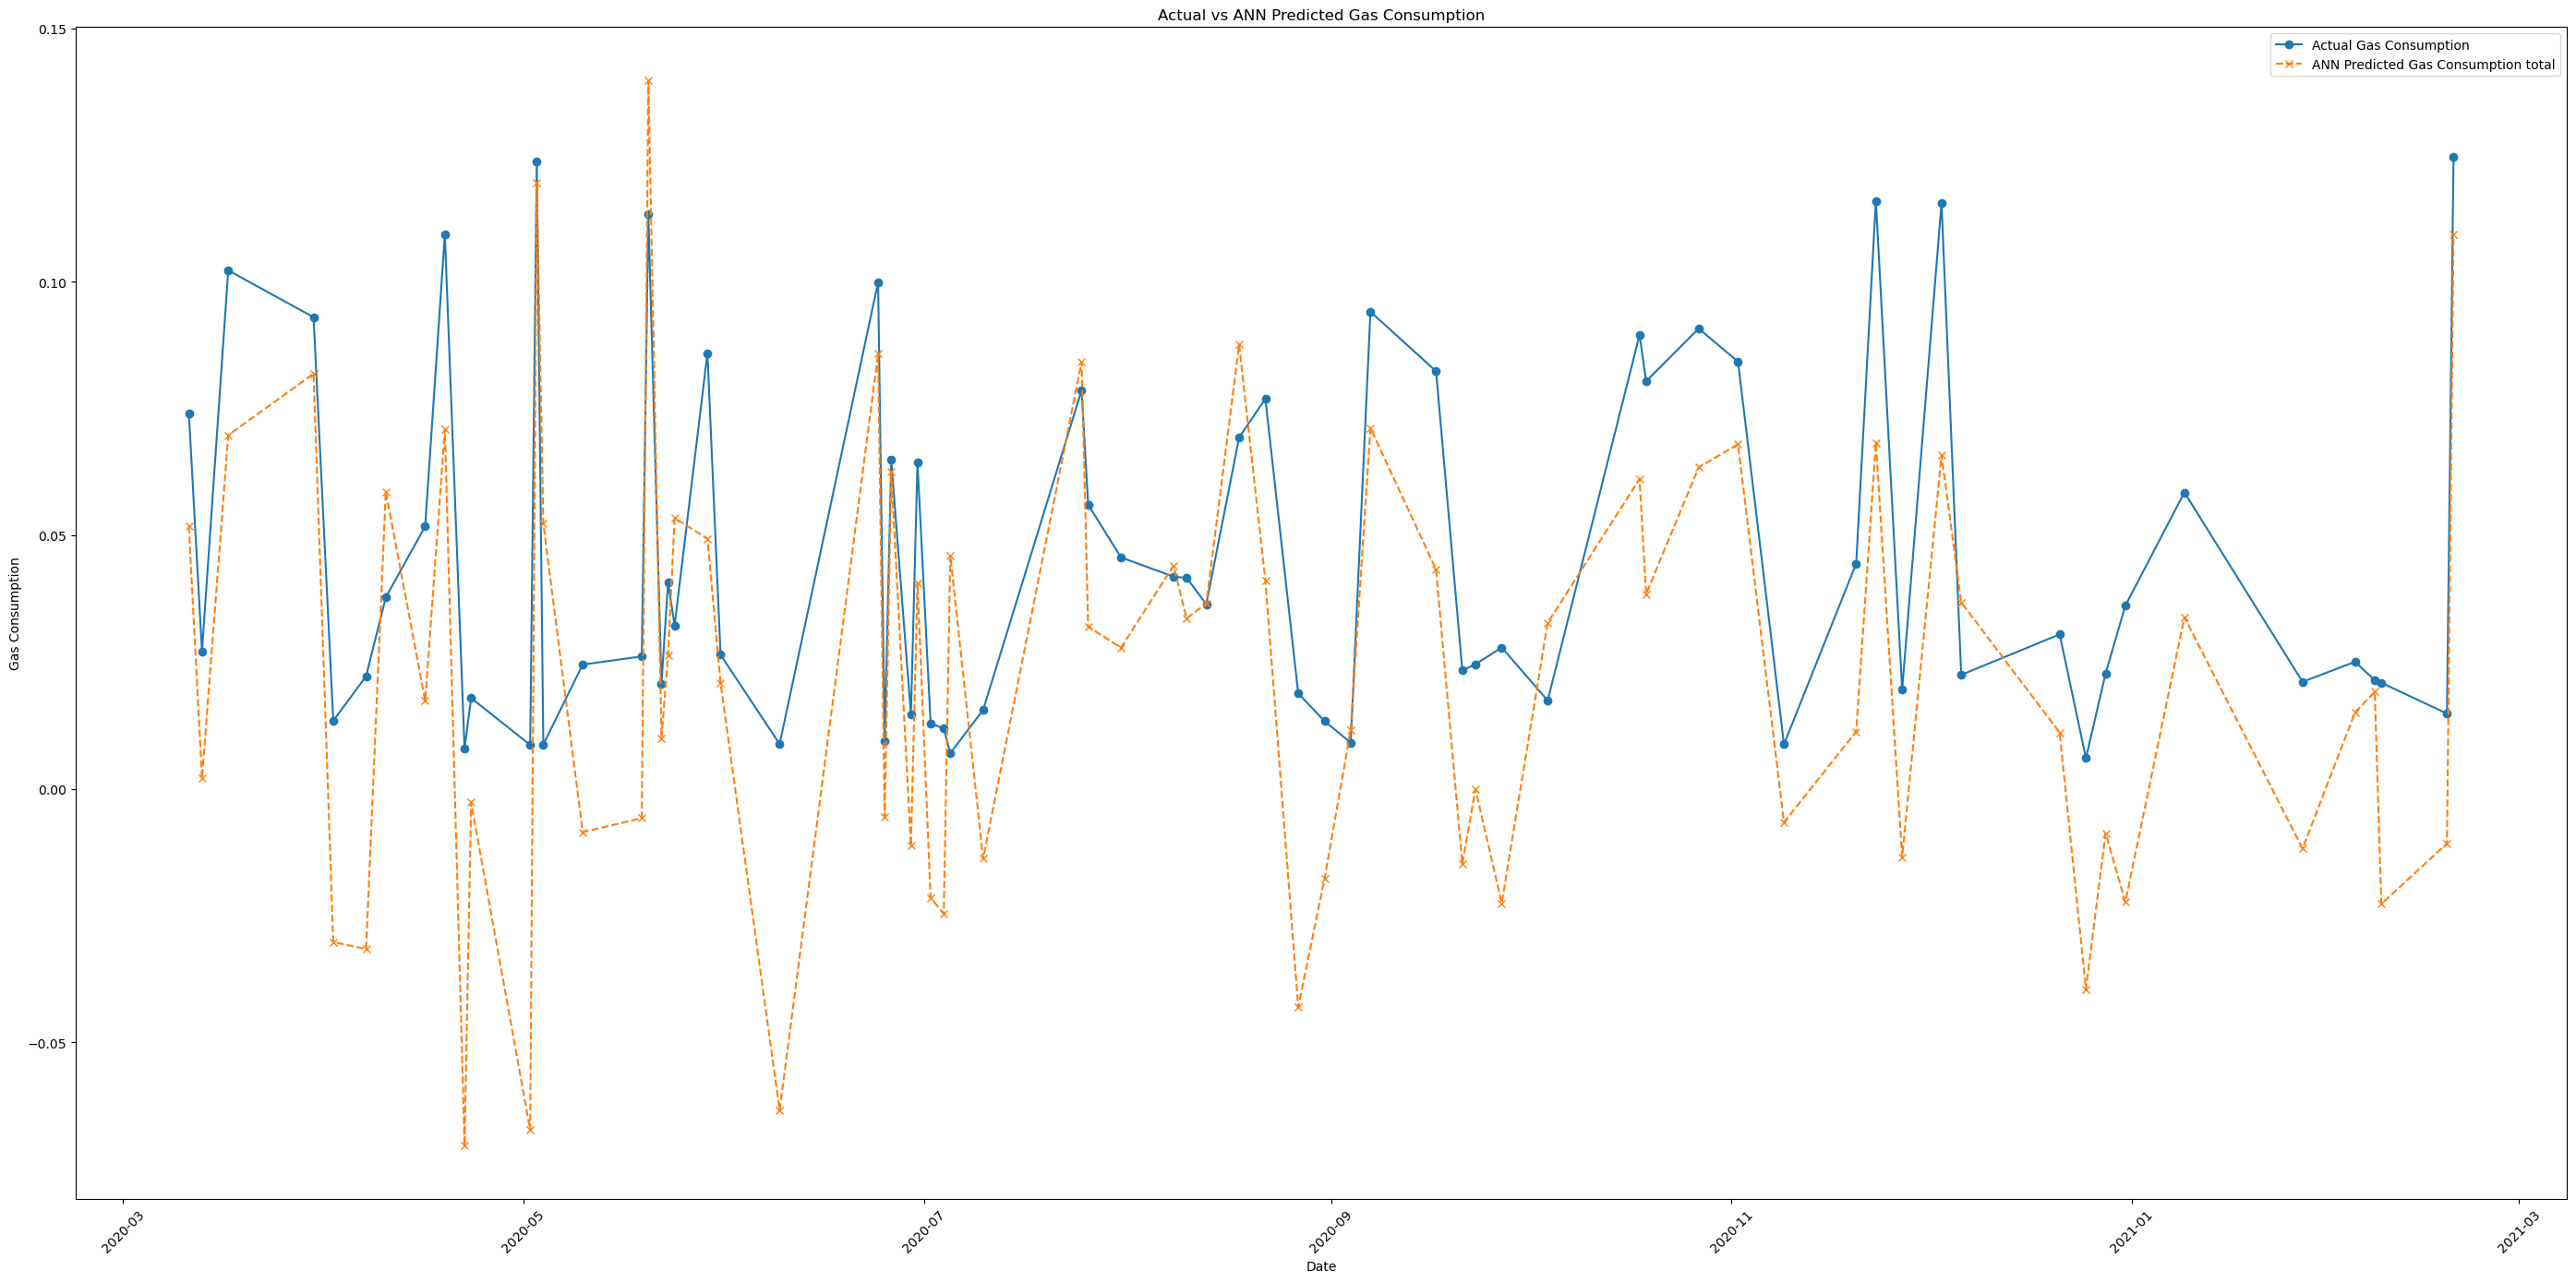

In [175]:
# Plot actual vs predicted gas consumption over time
plt.figure(figsize=(28, 14))
plt.plot(date_test, y_test, label='Actual Gas Consumption', marker='o')
plt.plot(date_test, predictions, label='ANN Predicted Gas Consumption total', marker='x', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Gas Consumption')
plt.title('Actual vs ANN Predicted Gas Consumption')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [176]:
import math

# Calculate evaluation metrics
mae_ANN  = mean_absolute_error(y_test, predictions)
mse_ANN  = mean_squared_error(y_test,  predictions)
rmse_ANN = math.sqrt(mse)
r2_ANN  = r2_score(y_test,  predictions)
n = len(y_test)
p = X_test.shape[1]
adjusted_r2_ANN  = 1 - (1 - r2) * (n - 1) / (n - p - 1)
mape_ANN  = mean_absolute_percentage_error(y_test,  predictions)

print(f'Mean Squared Error (MSE): {mse_ANN }')
print(f'Root Mean Squared Error (RMSE): {rmse_ANN }')
print(f'R-squared (R²): {r2_ANN }')
print(f'Adjusted R-squared (R²): {adjusted_r2_ANN }')

print(f'Mean Absolute Error (MAE): {mae_ANN }')
print(f'Mean Absolute Percentage Error (MAPE): {mape_ANN }%')

Mean Squared Error (MSE): 0.0011129637104680113
Root Mean Squared Error (RMSE): 0.033361110749913755
R-squared (R²): 0.09704559993119966
Adjusted R-squared (R²): 0.041479175311581185
Mean Absolute Error (MAE): 0.028455712596774024
Mean Absolute Percentage Error (MAPE): 1.4651637639527615%


Epoch 1/50
7/7 [==============================] - 0s 10ms/step - loss: 0.0050 - val_loss: 0.0025
Epoch 2/50
7/7 [==============================] - 0s 5ms/step - loss: 0.0054 - val_loss: 0.0028
Epoch 3/50
7/7 [==============================] - 0s 5ms/step - loss: 0.0033 - val_loss: 0.0016
Epoch 4/50
7/7 [==============================] - 0s 6ms/step - loss: 0.0032 - val_loss: 8.4602e-04
Epoch 5/50
7/7 [==============================] - 0s 5ms/step - loss: 0.0028 - val_loss: 8.3870e-04
Epoch 6/50
7/7 [==============================] - 0s 5ms/step - loss: 0.0026 - val_loss: 0.0012
Epoch 7/50
7/7 [==============================] - 0s 5ms/step - loss: 0.0030 - val_loss: 0.0017
Epoch 8/50
7/7 [==============================] - 0s 4ms/step - loss: 0.0029 - val_loss: 0.0017
Epoch 9/50
7/7 [==============================] - 0s 5ms/step - loss: 0.0037 - val_loss: 9.0382e-04
Epoch 10/50
7/7 [==============================] - 0s 6ms/step - loss: 0.0030 - val_loss: 0.0011
Epoch 11/50
7/7 [=========

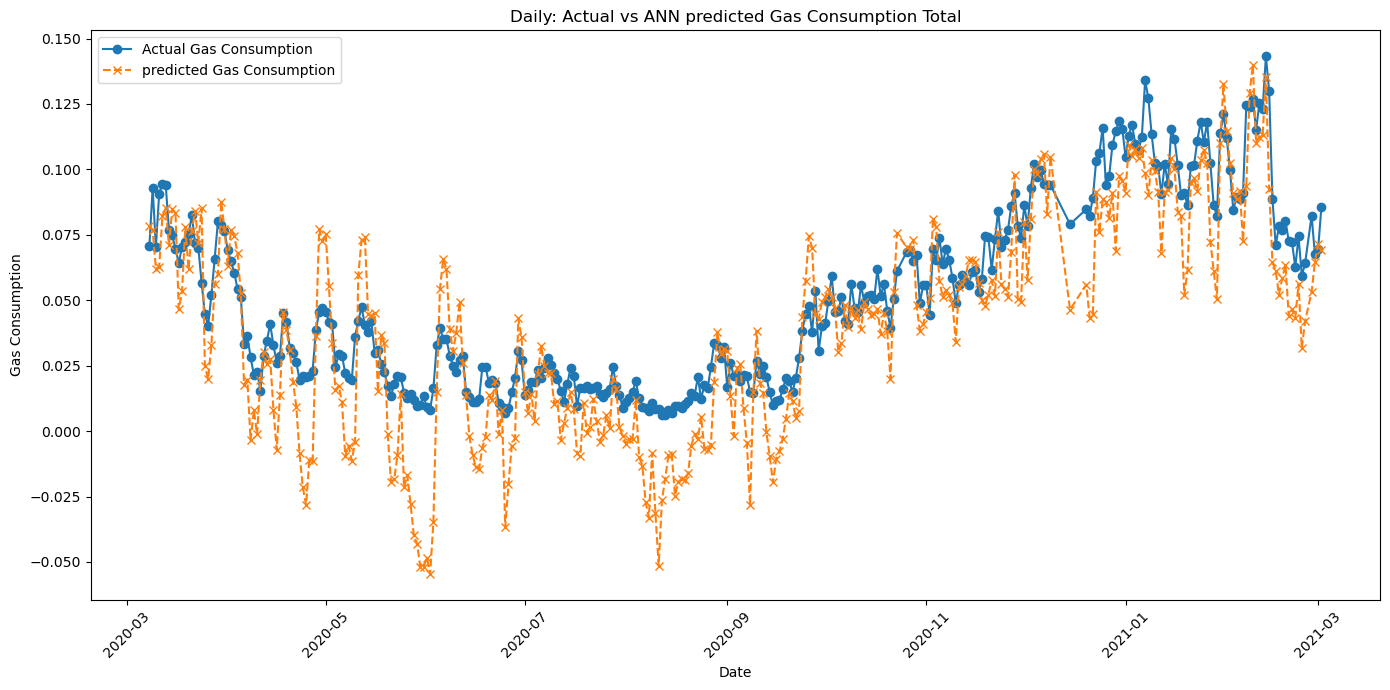

Mean Squared Error (MSE): 0.00042175998836747295
Root Mean Squared Error (RMSE): 0.033361110749913755
R-squared (R²): 0.6470954485216318
Adjusted R-squared (R²): 0.041479175311581185
Mean Absolute Error (MAE): 0.01640742916150564
Mean Absolute Percentage Error (MAPE): 0.7353940500296344%


In [177]:
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)
predictions = model.predict(features_scaled).flatten()

# Plot actual vs DWH predicted gas consumption over time
plt.figure(figsize=(14, 7))
plt.plot(daily_stat['date'], daily_stat['Gas_mean'], label='Actual Gas Consumption', marker='o')
plt.plot(daily_stat['date'], predictions, label='predicted Gas Consumption', marker='x', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Gas Consumption')
plt.title('Daily: Actual vs ANN predicted Gas Consumption Total')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

import math

# Calculate evaluation metrics
mae_ANN  = mean_absolute_error(target, predictions)
mse_ANN  = mean_squared_error(target,  predictions)
rmse_ANN = math.sqrt(mse)
r2_ANN  = r2_score(target,  predictions)
n = len(y_test)
p = features_scaled.shape[1]
adjusted_r2_ANN  = 1 - (1 - r2) * (n - 1) / (n - p - 1)
mape_ANN  = mean_absolute_percentage_error(target,  predictions)

print(f'Mean Squared Error (MSE): {mse_ANN }')
print(f'Root Mean Squared Error (RMSE): {rmse_ANN }')
print(f'R-squared (R²): {r2_ANN }')
print(f'Adjusted R-squared (R²): {adjusted_r2_ANN }')

print(f'Mean Absolute Error (MAE): {mae_ANN }')
print(f'Mean Absolute Percentage Error (MAPE): {mape_ANN }%')


# ANN SH

Epoch 1/50
7/7 [==============================] - 1s 18ms/step - loss: 0.0426 - val_loss: 0.0082
Epoch 2/50
7/7 [==============================] - 0s 5ms/step - loss: 0.0100 - val_loss: 0.0031
Epoch 3/50
7/7 [==============================] - 0s 5ms/step - loss: 0.0097 - val_loss: 0.0024
Epoch 4/50
7/7 [==============================] - 0s 5ms/step - loss: 0.0059 - val_loss: 0.0027
Epoch 5/50
7/7 [==============================] - 0s 5ms/step - loss: 0.0049 - val_loss: 0.0019
Epoch 6/50
7/7 [==============================] - 0s 5ms/step - loss: 0.0042 - val_loss: 0.0014
Epoch 7/50
7/7 [==============================] - 0s 5ms/step - loss: 0.0041 - val_loss: 8.1549e-04
Epoch 8/50
7/7 [==============================] - 0s 5ms/step - loss: 0.0039 - val_loss: 7.4840e-04
Epoch 9/50
7/7 [==============================] - 0s 5ms/step - loss: 0.0041 - val_loss: 7.1654e-04
Epoch 10/50
7/7 [==============================] - 0s 5ms/step - loss: 0.0034 - val_loss: 6.0945e-04
Epoch 11/50
7/7 [=====

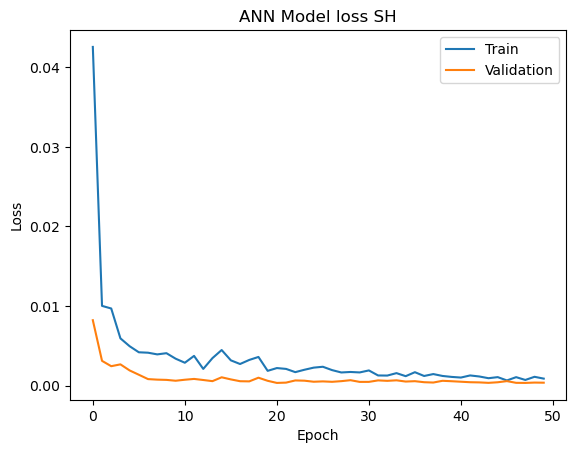

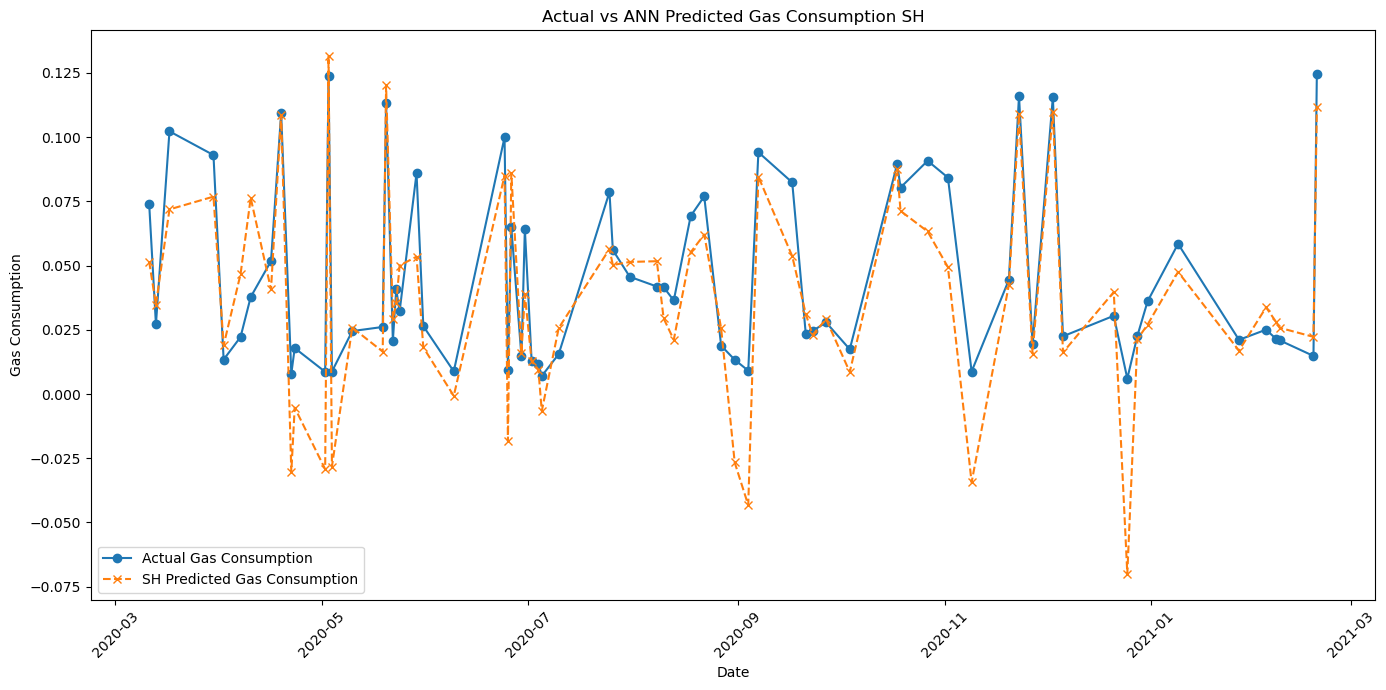

In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load the data
daily_stat = pd.read_csv('daily_stat.csv').dropna()

# Ensure the date column is parsed as datetime
daily_stat['date'] = pd.to_datetime(daily_stat['date'])

# Extract features and target
features = daily_stat[['SH_temp_mean', 'SH_hum_mean']]
target = daily_stat['Gas_mean']

# Normalize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Split data while keeping the date for plotting
X_train, X_test, y_train, y_test, date_train, date_test = train_test_split(features_scaled, target, daily_stat['date'], test_size=0.2, random_state=42)

# Ensure dates are sorted
date_test = pd.Series(date_test).sort_values().reset_index(drop=True)
date_train = pd.Series(date_train).sort_values().reset_index(drop=True)


# Build ANN model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Predict gas consumption on the test set
SH_predictions = model.predict(X_test).flatten()

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, SH_predictions)
mse = mean_squared_error(y_test, SH_predictions)
r2 = r2_score(y_test, SH_predictions)
mape = mean_absolute_percentage_error(y_test, SH_predictions)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')

# Assuming SH periods are marked in your dataset, create boolean masks for SH and DWH periods
#external_temp_test = X_test[:, 4] * scaler.scale_[4] + scaler.mean_[4]  # Reverse normalization for external temp
#sh_dwh_periods = external_temp_test < 15
#dwh_periods = external_temp_test >= 15

# For simplicity, assume gas consumption for SH and DWH can be linearly decomposed
#sh_dwh_contributions = SH_predictions * sh_dwh_periods
#dwh_contributions = SH_predictions * dwh_periods

# Plot training loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('ANN Model loss SH')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()



# Plot actual vs SH Predicted gas consumption over time
plt.figure(figsize=(14, 7))
plt.plot(date_test, y_test, label='Actual Gas Consumption', marker='o')
plt.plot(date_test, SH_predictions, label='SH Predicted Gas Consumption', marker='x', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Gas Consumption')
plt.title('Actual vs ANN Predicted Gas Consumption SH')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




In [179]:
import math

# Calculate evaluation metrics
mae_ANN_SH  = mean_absolute_error(y_test, SH_predictions)
mse_ANN_SH  = mean_squared_error(y_test, SH_predictions)
rmse_ANN_SH = math.sqrt(mse)
r2_ANN_SH  = r2_score(y_test, SH_predictions)
n = len(y_test)
p = X_test.shape[1]
adjusted_r2_ANN_SH  = 1 - (1 - r2) * (n - 1) / (n - p - 1)
mape_ANN_SH  = mean_absolute_percentage_error(y_test, SH_predictions)

print(f'Mean Squared Error (MSE): {mse_ANN_SH }')
print(f'Root Mean Squared Error (RMSE): {rmse_ANN_SH }')
print(f'R-squared (R²): {r2_ANN_SH }')
print(f'Adjusted R-squared (R²): {adjusted_r2_ANN_SH }')

print(f'Mean Absolute Error (MAE): {mae_ANN_SH }')
print(f'Mean Absolute Percentage Error (MAPE): {mape_ANN_SH }%')

Mean Squared Error (MSE): 0.00043446479640317926
Root Mean Squared Error (RMSE): 0.020843819141490826
R-squared (R²): 0.647516000838626
Adjusted R-squared (R²): 0.6369940904158984
Mean Absolute Error (MAE): 0.015241419948440539
Mean Absolute Percentage Error (MAPE): 0.8945879098338094%


Epoch 1/20
7/7 [==============================] - 0s 9ms/step - loss: 9.6321e-04 - val_loss: 4.1613e-04
Epoch 2/20
7/7 [==============================] - 0s 5ms/step - loss: 7.7732e-04 - val_loss: 3.0452e-04
Epoch 3/20
7/7 [==============================] - 0s 5ms/step - loss: 6.2556e-04 - val_loss: 2.7331e-04
Epoch 4/20
7/7 [==============================] - 0s 5ms/step - loss: 0.0010 - val_loss: 3.5487e-04
Epoch 5/20
7/7 [==============================] - 0s 5ms/step - loss: 7.6873e-04 - val_loss: 3.1426e-04
Epoch 6/20
7/7 [==============================] - 0s 5ms/step - loss: 8.8095e-04 - val_loss: 2.6832e-04
Epoch 7/20
7/7 [==============================] - 0s 5ms/step - loss: 7.4078e-04 - val_loss: 4.0428e-04
Epoch 8/20
7/7 [==============================] - 0s 5ms/step - loss: 7.4507e-04 - val_loss: 3.1947e-04
Epoch 9/20
7/7 [==============================] - 0s 5ms/step - loss: 0.0011 - val_loss: 3.7627e-04
Epoch 10/20
7/7 [==============================] - 0s 5ms/step - loss: 6

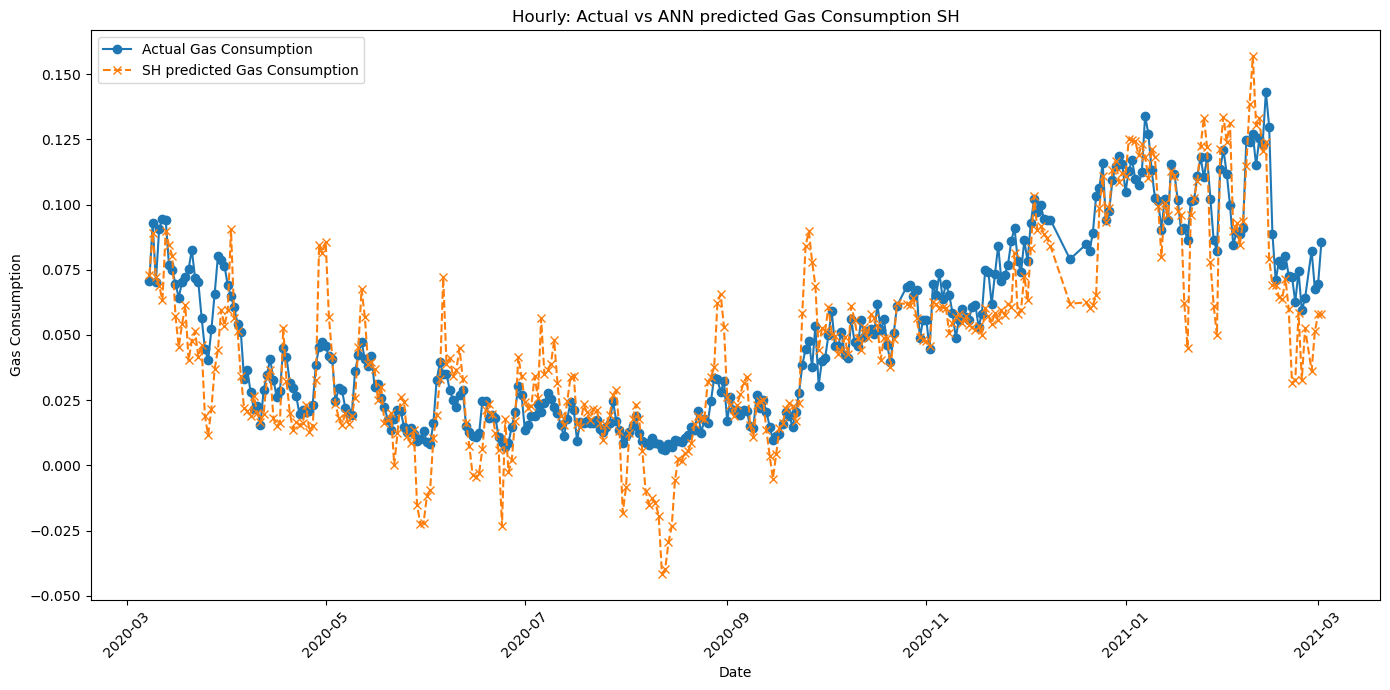

Mean Squared Error (MSE): 0.000246503460117551
Root Mean Squared Error (RMSE): 0.020843819141490826
R-squared (R²): 0.7937400525655004
Adjusted R-squared (R²): 0.6454726153362412
Mean Absolute Error (MAE): 0.011666273999878874
Mean Absolute Percentage Error (MAPE): 0.4402352937544644%


In [180]:
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)
SH_predictions = model.predict(features_scaled).flatten()

# Plot actual vs DWH predicted gas consumption over time
plt.figure(figsize=(14, 7))
plt.plot(daily_stat['date'], daily_stat['Gas_mean'], label='Actual Gas Consumption', marker='o')
plt.plot(daily_stat['date'], SH_predictions, label='SH predicted Gas Consumption', marker='x', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Gas Consumption')
plt.title('Hourly: Actual vs ANN predicted Gas Consumption SH')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


import math

# Calculate evaluation metrics
mae_ANN_SH  = mean_absolute_error(target, SH_predictions)
mse_ANN_SH  = mean_squared_error(target, SH_predictions)
rmse_ANN_SH = math.sqrt(mse)
r2_ANN_SH  = r2_score(target, SH_predictions)
n = len(target)
p = features_scaled.shape[1]
adjusted_r2_ANN_SH  = 1 - (1 - r2) * (n - 1) / (n - p - 1)
mape_ANN_SH  = mean_absolute_percentage_error(target, SH_predictions)

print(f'Mean Squared Error (MSE): {mse_ANN_SH }')
print(f'Root Mean Squared Error (RMSE): {rmse_ANN_SH }')
print(f'R-squared (R²): {r2_ANN_SH }')
print(f'Adjusted R-squared (R²): {adjusted_r2_ANN_SH }')

print(f'Mean Absolute Error (MAE): {mae_ANN_SH }')
print(f'Mean Absolute Percentage Error (MAPE): {mape_ANN_SH }%')

# ANN DWH

Epoch 1/50
7/7 [==============================] - 1s 17ms/step - loss: 0.0413 - val_loss: 0.0083
Epoch 2/50
7/7 [==============================] - 0s 6ms/step - loss: 0.0139 - val_loss: 0.0028
Epoch 3/50
7/7 [==============================] - 0s 5ms/step - loss: 0.0089 - val_loss: 0.0034
Epoch 4/50
7/7 [==============================] - 0s 6ms/step - loss: 0.0110 - val_loss: 8.4621e-04
Epoch 5/50
7/7 [==============================] - 0s 6ms/step - loss: 0.0051 - val_loss: 0.0013
Epoch 6/50
7/7 [==============================] - 0s 5ms/step - loss: 0.0047 - val_loss: 0.0014
Epoch 7/50
7/7 [==============================] - 0s 5ms/step - loss: 0.0051 - val_loss: 7.5464e-04
Epoch 8/50
7/7 [==============================] - 0s 5ms/step - loss: 0.0034 - val_loss: 5.1592e-04
Epoch 9/50
7/7 [==============================] - 0s 5ms/step - loss: 0.0035 - val_loss: 6.6132e-04
Epoch 10/50
7/7 [==============================] - 0s 6ms/step - loss: 0.0036 - val_loss: 6.1379e-04
Epoch 11/50
7/7 [=

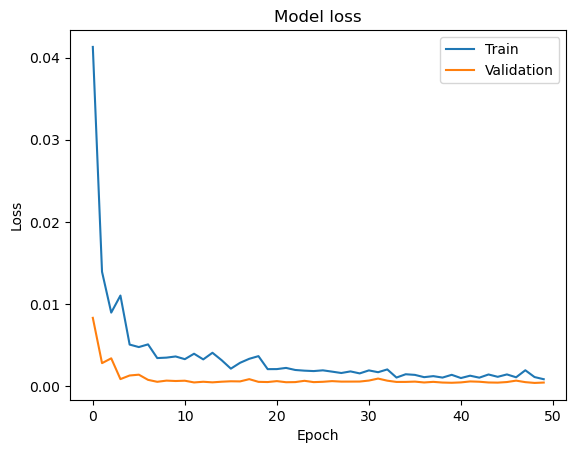

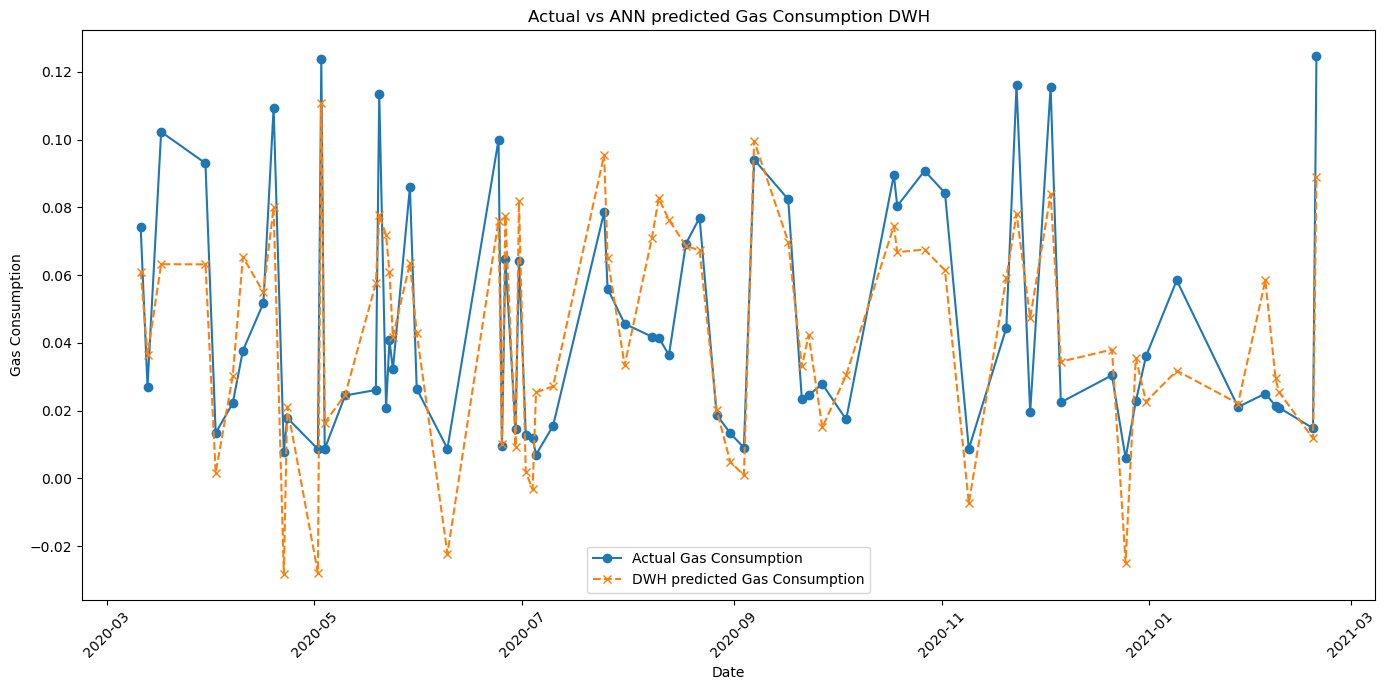

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load the data
daily_stat = pd.read_csv('daily_stat.csv').dropna()

# Ensure the date column is parsed as datetime
daily_stat['date'] = pd.to_datetime(daily_stat['date'])

# Extract features and target
features = daily_stat[['DWH_temp_mean', 'DWH_hum_mean']]
target = daily_stat['Gas_mean']

# Normalize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Split data while keeping the date for plotting
X_train, X_test, y_train, y_test, date_train, date_test = train_test_split(features_scaled, target, daily_stat['date'], test_size=0.2, random_state=42)

# Ensure dates are sorted
date_test = pd.Series(date_test).sort_values().reset_index(drop=True)
date_train = pd.Series(date_train).sort_values().reset_index(drop=True)


# Build ANN model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Predict gas consumption on the test set
DWH_predictions = model.predict(X_test).flatten()

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, DWH_predictions)
mse = mean_squared_error(y_test, DWH_predictions)
r2 = r2_score(y_test, DWH_predictions)
mape = mean_absolute_percentage_error(y_test, DWH_predictions)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')

# Assuming SH periods are marked in your dataset, create boolean masks for SH and DWH periods
#external_temp_test = X_test[:, 4] * scaler.scale_[4] + scaler.mean_[4]  # Reverse normalization for external temp
#sh_dwh_periods = external_temp_test < 15
#dwh_periods = external_temp_test >= 15

# For simplicity, assume gas consumption for SH and DWH can be linearly decomposed
#sh_dwh_contributions = DWH_predictions * sh_dwh_periods
#dwh_contributions = DWH_predictions * dwh_periods

# Plot training loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()





# Plot actual vs DWH predicted gas consumption over time
plt.figure(figsize=(14, 7))
plt.plot(date_test, y_test, label='Actual Gas Consumption', marker='o')
plt.plot(date_test, DWH_predictions, label='DWH predicted Gas Consumption', marker='x', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Gas Consumption')
plt.title('Actual vs ANN predicted Gas Consumption DWH')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




In [182]:
import math

# Calculate evaluation metrics
mae_ANN_DWH  = mean_absolute_error(y_test, DWH_predictions)
mse_ANN_DWH = mean_squared_error(y_test, DWH_predictions)
rmse_ANN_DWH= math.sqrt(mse_ANN_DWH)
r2_ANN_DWH = r2_score(y_test, DWH_predictions)
n = len(y_test)
p = X_test.shape[1]
adjusted_r2_ANN_DWH = 1 - (1 - r2) * (n - 1) / (n - p - 1)
mape_ANN_DWH = mean_absolute_percentage_error(y_test, DWH_predictions)

print(f'Mean Squared Error (MSE): {mae_ANN_DWH }')
print(f'Root Mean Squared Error (RMSE): {mse_ANN_DWH }')
print(f'R-squared (R²): {r2_ANN_DWH }')
print(f'Adjusted R-squared (R²): {adjusted_r2_ANN_DWH }')

print(f'Mean Absolute Error (MAE): {mae_ANN_DWH }')
print(f'Mean Absolute Percentage Error (MAPE): {mape_ANN_DWH }%')

Mean Squared Error (MSE): 0.017733114153686332
Root Mean Squared Error (RMSE): 0.0004572933713370485
R-squared (R²): 0.6289950356086191
Adjusted R-squared (R²): 0.6179202605521601
Mean Absolute Error (MAE): 0.017733114153686332
Mean Absolute Percentage Error (MAPE): 0.7408749340185418%


Epoch 1/20
7/7 [==============================] - 0s 9ms/step - loss: 0.0010 - val_loss: 4.8186e-04
Epoch 2/20
7/7 [==============================] - 0s 6ms/step - loss: 9.0786e-04 - val_loss: 4.6741e-04
Epoch 3/20
7/7 [==============================] - 0s 5ms/step - loss: 9.7362e-04 - val_loss: 4.0176e-04
Epoch 4/20
7/7 [==============================] - 0s 5ms/step - loss: 9.2860e-04 - val_loss: 3.7354e-04
Epoch 5/20
7/7 [==============================] - 0s 5ms/step - loss: 8.0864e-04 - val_loss: 4.6056e-04
Epoch 6/20
7/7 [==============================] - 0s 5ms/step - loss: 9.1870e-04 - val_loss: 3.9767e-04
Epoch 7/20
7/7 [==============================] - 0s 5ms/step - loss: 9.8651e-04 - val_loss: 4.1696e-04
Epoch 8/20
7/7 [==============================] - 0s 5ms/step - loss: 7.9028e-04 - val_loss: 3.9128e-04
Epoch 9/20
7/7 [==============================] - 0s 5ms/step - loss: 8.7310e-04 - val_loss: 4.2961e-04
Epoch 10/20
7/7 [==============================] - 0s 6ms/step - los

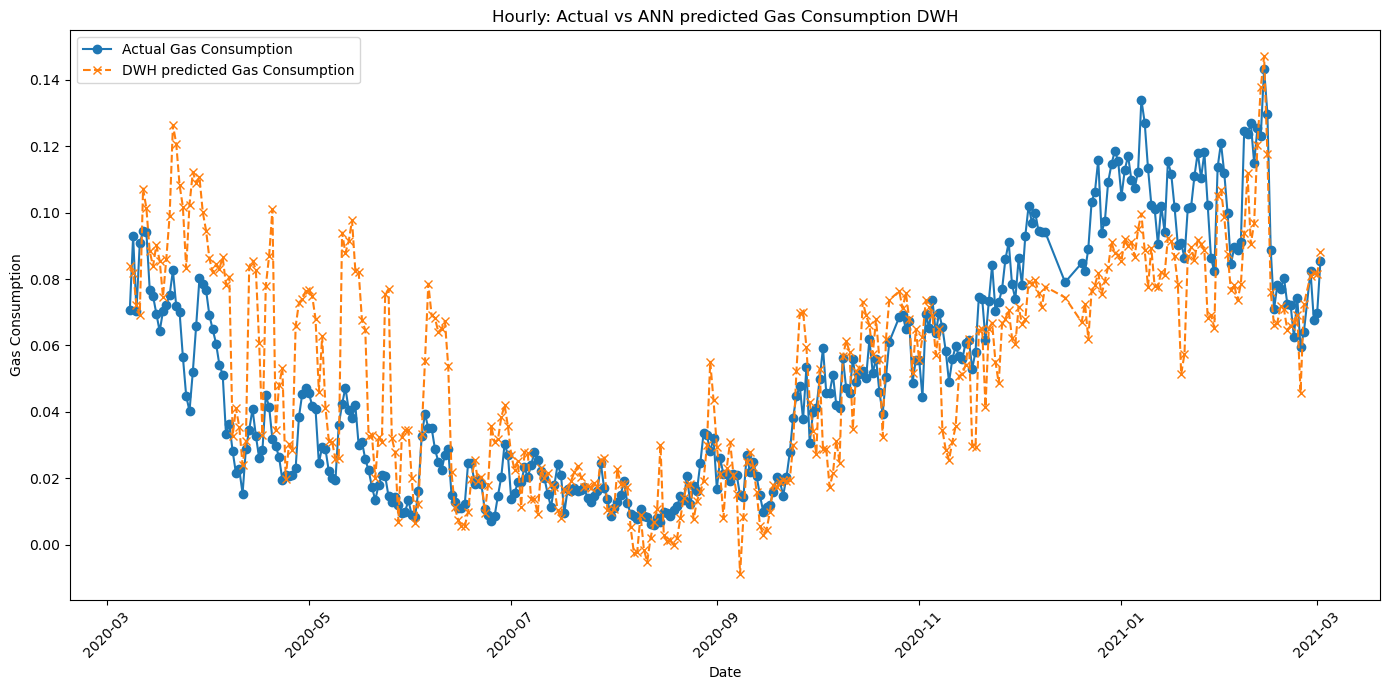

Mean Squared Error (MSE): 0.016141621817216144
Root Mean Squared Error (RMSE): 0.0004438492726379306
R-squared (R²): 0.6286124032519322
Adjusted R-squared (R²): 0.6268442821918575
Mean Absolute Error (MAE): 0.016141621817216144
Mean Absolute Percentage Error (MAPE): 0.4716670340791149%


In [183]:
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)
DWH_predictions = model.predict(features_scaled).flatten()

# Plot actual vs DWH predicted gas consumption over time
plt.figure(figsize=(14, 7))
plt.plot(daily_stat['date'], daily_stat['Gas_mean'], label='Actual Gas Consumption', marker='o')
plt.plot(daily_stat['date'], DWH_predictions, label='DWH predicted Gas Consumption', marker='x', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Gas Consumption')
plt.title('Hourly: Actual vs ANN predicted Gas Consumption DWH')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

import math

# Calculate evaluation metrics
mae_ANN_DWH  = mean_absolute_error(target, DWH_predictions)
mse_ANN_DWH = mean_squared_error(target, DWH_predictions)
rmse_ANN_DWH= math.sqrt(mse_ANN_DWH)
r2_ANN_DWH = r2_score(target, DWH_predictions)
n = len(target)
p = features_scaled.shape[1]
adjusted_r2_ANN_DWH = 1 - (1 - r2) * (n - 1) / (n - p - 1)
mape_ANN_DWH = mean_absolute_percentage_error(target, DWH_predictions)

print(f'Mean Squared Error (MSE): {mae_ANN_DWH }')
print(f'Root Mean Squared Error (RMSE): {mse_ANN_DWH }')
print(f'R-squared (R²): {r2_ANN_DWH }')
print(f'Adjusted R-squared (R²): {adjusted_r2_ANN_DWH }')

print(f'Mean Absolute Error (MAE): {mae_ANN_DWH }')
print(f'Mean Absolute Percentage Error (MAPE): {mape_ANN_DWH }%')

In [184]:
import pandas as pd

# Define the metrics for each category
metrics = ['MAE', 'MSE', 'RMSE', 'R2', 'Adjusted R2', 'MAPE']

# Define the values for each metric
ANN_values = [mae_ANN, mse_ANN, rmse_ANN, r2_ANN, adjusted_r2_ANN, mape_ANN]
sh_values = [mae_ANN_SH, mse_ANN_SH, rmse_ANN_SH, r2_ANN_SH, adjusted_r2_ANN_SH, mape_ANN_SH]
dwh_values = [mae_ANN_DWH, mse_ANN_DWH, rmse_ANN_DWH, r2_ANN_DWH, adjusted_r2_ANN_DWH, mape_ANN_DWH]

# Create a dictionary to hold the data
data = {
    'Metric': metrics,
    'Total ANN': ANN_values,
    'SH ANN': sh_values,
    'DWH ANN': dwh_values
}

# Create a DataFrame
df_metrics = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df_metrics.to_csv('ANN_daily_metrics.csv', index=False)

# Print the DataFrame to check
print(df_metrics)


        Metric  Total ANN    SH ANN   DWH ANN
0          MAE   0.016407  0.011666  0.016142
1          MSE   0.000422  0.000247  0.000444
2         RMSE   0.033361  0.020844  0.021068
3           R2   0.647095  0.793740  0.628612
4  Adjusted R2   0.041479  0.645473  0.626844
5         MAPE   0.735394  0.440235  0.471667


In [185]:
daily_stat

date   Gas_sum   Gas_max   Gas_min  Gas_mean  ext_temp_max  \
0   2020-03-08  3.390954  0.142667  0.020000  0.070645     10.966667   
1   2020-03-09  4.457667  0.209000  0.012000  0.092868     11.333333   
2   2020-03-10  3.381333  0.157667  0.021667  0.070444     12.900000   
3   2020-03-11  4.357000  0.210667  0.018333  0.090771     12.000000   
4   2020-03-12  4.533103  0.196897  0.035862  0.094440      9.533333   
..         ...       ...       ...       ...       ...           ...   
354 2021-02-25  3.075368  0.158667  0.012667  0.064070      9.800000   
356 2021-02-27  3.870000  0.148000  0.029667  0.082340     11.800000   
357 2021-02-28  3.249333  0.144333  0.021000  0.067694     11.466667   
358 2021-03-01  3.343667  0.197667  0.009333  0.069660     11.466667   
359 2021-03-02  4.108333  0.459667  0.018333  0.085590      4.500000   

     ext_temp_min  ext_temp_mean  ext_hum_max  ext_hum_min  ...  SH_temp_mean  \
0        5.633333       8.673611    85.666667    55.000000  ...     20.440088   
1        6.400000       8.072917    89.333333    61.333333  ...     19.974721   
2        8.366667      11.388194    90.000000    58.333333  ...     20.405663   
3        6.000000       8.868056    77.000000    56.333333  ...     20.491250   
4        4.033333       6.532639    78.666667    52.333333  ...     19.898139   
..            ...            ...          ...          ...  ...           ...   
354      4.233333       7.747222    85.333333    58.666667  ...     20.894433   
356      1.133333       6.463830    90.000000    50.666667  ...     20.957647   
357      1.033333       6.178472    90.000000    51.666667  ...     20.723700   
358      2.300000       5.593750    87.666667    52.333333  ...     20.554832   
359      2.600000       3.345098    81.000000    78.000000  ...     20.403154   

     SH_hum_max  SH_hum_min  SH_hum_mean  DWH_temp_max  DWH_temp_min  \
0     56.348934   48.547807    52.482633     21.527065     18.830000   
1     55.553181   48.356860    51.514063     22.500000     17.166000   
2     58.069711   51.024262    55.408013     22.662600     17.957400   
3     54.798436   47.512478    52.187974     22.529808     19.076923   
4     48.051281   41.042851    45.248958     22.230556     18.543462   
..          ...         ...          ...           ...           ...   
354   61.412240   49.264031    56.110918     21.632727     19.540000   
356   52.617157   48.526470    50.546910     22.151477     19.926739   
357   52.379383   49.446407    51.351237     22.558750     19.261087   
358   52.995683   49.081847    50.872736     22.187609     18.216087   
359   51.599304   47.176381    49.352818     22.674565     18.594545   

     DWH_temp_mean  DWH_hum_max  DWH_hum_min  DWH_hum_mean  
0        20.404865    54.471739    48.157083     49.943412  
1        20.458280    77.400000    46.037115     52.373323  
2        20.991088    59.439600    49.091200     52.729024  
3        21.502654    57.177308    43.674200     48.275562  
4        21.127058    48.535962    38.434400     40.883145  
..             ...          ...          ...           ...  
354      20.743657    64.452174    49.832273     54.596733  
356      20.718636    53.565500    47.776087     49.642770  
357      20.896852    54.471522    47.411304     49.526565  
358      20.925813    56.015652    47.803261     49.608494  
359      21.036228    54.542273    45.278571     48.077677  

[348 rows x 23 columns]

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.linear_model import Lasso, Ridge
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import math

# Load the data
daily_stat = pd.read_csv('daily_stat.csv').dropna()

# Parse the date column to datetime format
daily_stat['date'] = pd.to_datetime(daily_stat['date'])


# Extract features and target
features = daily_stat[['SH_temp_mean', 'SH_hum_mean']]
target = daily_stat['Gas_mean']

# Normalize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Split data while keeping the date for plotting
X_train, X_test, y_train, y_test, date_train, date_test = train_test_split(features_scaled, target, daily_stat['date'], test_size=0.2, random_state=42)

# Build ANN model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Predict gas consumption on the test set
predictions = model.predict(X_test).flatten()

# Calculate evaluation metrics for ANN
mae_ANN = mean_absolute_error(y_test, predictions)
mse_ANN = mean_squared_error(y_test, predictions)
rmse_ANN = math.sqrt(mse_ANN)
r2_ANN = r2_score(y_test, predictions)
n = len(y_test)
p = X_test.shape[1]
adjusted_r2_ANN = 1 - (1 - r2_ANN) * (n - 1) / (n - p - 1)
mape_ANN = mean_absolute_percentage_error(y_test, predictions)

print(f'ANN - MAE: {mae_ANN}, MSE: {mse_ANN}, RMSE: {rmse_ANN}, R2: {r2_ANN}, Adjusted R2: {adjusted_r2_ANN}, MAPE: {mape_ANN}%')

# Train Lasso regression model
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
lasso_predictions = lasso.predict(X_test).flatten()

# Calculate evaluation metrics for Lasso
mae_lasso = mean_absolute_error(y_test, lasso_predictions)
mse_lasso = mean_squared_error(y_test, lasso_predictions)
rmse_lasso = math.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, lasso_predictions)
adjusted_r2_lasso = 1 - (1 - r2_lasso) * (n - 1) / (n - p - 1)
mape_lasso = mean_absolute_percentage_error(y_test, lasso_predictions)

print(f'Lasso - MAE: {mae_lasso}, MSE: {mse_lasso}, RMSE: {rmse_lasso}, R2: {r2_lasso}, Adjusted R2: {adjusted_r2_lasso}, MAPE: {mape_lasso}%')

# Train Ridge regression model
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_predictions = ridge.predict(X_test).flatten()

# Calculate evaluation metrics for Ridge
mae_ridge = mean_absolute_error(y_test, ridge_predictions)
mse_ridge = mean_squared_error(y_test, ridge_predictions)
rmse_ridge = math.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, ridge_predictions)
adjusted_r2_ridge = 1 - (1 - r2_ridge) * (n - 1) / (n - p - 1)
mape_ridge = mean_absolute_percentage_error(y_test, ridge_predictions)

print(f'Ridge - MAE: {mae_ridge}, MSE: {mse_ridge}, RMSE: {rmse_ridge}, R2: {r2_ridge}, Adjusted R2: {adjusted_r2_ridge}, MAPE: {mape_ridge}%')

#date_test = pd.Series(date_test).sort_values().reset_index(drop=True)
#date_train = pd.Series(date_train).sort_values().reset_index(drop=True)


# Plot actual vs predicted gas consumption over time for all models
plt.figure(figsize=(14, 7))
plt.plot(date_test, y_test, label='Actual Gas Consumption', marker='o')
plt.plot(date_test, predictions, label='ANN Predicted Gas Consumption', marker='x', linestyle='--')
plt.plot(date_test, lasso_predictions, label='Lasso Predicted Gas Consumption', marker='s', linestyle=':')
plt.plot(date_test, ridge_predictions, label='Ridge Predicted Gas Consumption', marker='d', linestyle='-.')

plt.xlabel('Date')
plt.ylabel('Gas Consumption')
plt.title('Actual vs Predicted Gas Consumption')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


from sklearn.linear_model import Lasso, Ridge, ElasticNet

# Train ElasticNet regression model
elastic = ElasticNet(alpha=1.0, l1_ratio=0.5)
elastic.fit(X_train, y_train)
elastic_predictions = elastic.predict(X_test)

# Calculate evaluation metrics for ElasticNet
mae_elastic = mean_absolute_error(y_test, elastic_predictions)
mse_elastic = mean_squared_error(y_test, elastic_predictions)
rmse_elastic = math.sqrt(mse_elastic)
r2_elastic = r2_score(y_test, elastic_predictions)
adjusted_r2_elastic = 1 - (1 - r2_elastic) * (n - 1) / (n - p - 1)
mape_elastic = mean_absolute_percentage_error(y_test, elastic_predictions)

print(f'ElasticNet - MAE: {mae_elastic}, MSE: {mse_elastic}, RMSE: {rmse_elastic}, R2: {r2_elastic}, Adjusted R2: {adjusted_r2_elastic}, MAPE: {mape_elastic}%')

date_test = pd.Series(date_test).sort_values().reset_index(drop=True)
date_train = pd.Series(date_train).sort_values().reset_index(drop=True)

# Plot actual vs predicted gas consumption over time for all models
plt.figure(figsize=(14, 7))
plt.plot(date_test, y_test, label='Actual Gas Consumption', marker='o')
plt.plot(date_test, predictions, label='ANN Predicted Gas Consumption', marker='x', linestyle='--')
plt.plot(date_test, lasso_predictions, label='Lasso Predicted Gas Consumption', marker='s', linestyle=':')
plt.plot(date_test, ridge_predictions, label='Ridge Predicted Gas Consumption', marker='d', linestyle='-.')
plt.plot(date_test, elastic_predictions, label='ElasticNet Predicted Gas Consumption', marker='v', linestyle='-')

plt.xlabel('Date')
plt.ylabel('Gas Consumption')
plt.title('Actual vs Predicted Gas Consumption')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()